# Good Software - analysis notebook 2
## Reproducting all panels for Figure 2

This notebook contains all Python code necessary to reproduce all panels from the Figure 2 of our paper.

**Github**: https://github.com/smangul1/good.software

**Manuscript**:

### Importing Libraries

In [1]:
from __future__ import division
import pylab as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
import seaborn as sns  #be sure version >=0.9

In [2]:
# function for generating significance stars
def my_star(p_value):
    if p_value <= 0.001:
        return "***"
    elif p_value <= 0.01:
        return "**"
    elif p_value <= 0.05:
        return "*"
    else:
        return "None"
    

In [3]:
class my_colors: 
    red = (1.0,0.2,0.1)
    orange = (1.0,0.6,0.2)
    green = (0.3,0.9,0.3)
    blue = (0.3,0.7,1.0)
    
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()    

# class my_params:
#     fontsize = 14
#     dot_size = 5

### Importing and Parsing Data

In [4]:
data = pd.read_csv('usability_cleaned_data.csv')
data.head()

,Unnamed: 0,Source,Normalized citations,Commands,Commands Listed,Time To Install,Difficulty Status,Example Provided
0,1,Bioconda,1122.600000,1.0,1.0,5,2,Y
1,2,Bioconda,13.833333,1.0,1.0,5,2,Y
2,3,Bioconda,5.142857,1.0,1.0,5,2,Y
3,4,Bioconda,163.200000,1.0,1.0,5,2,Y
4,5,Bioconda,247.400000,1.0,1.0,15,2,Y


### Clean Column Names for Filtering

In [5]:
data.columns = [c.replace(' ', '_') for c in data.columns]
print(data.columns)

Index(['Unnamed:_0', 'Source_', 'Normalized_citations', 'Commands',
       'Commands_Listed', 'Time_To_Install', 'Difficulty_Status',
       'Example_Provided'],
      dtype='object')


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
Unnamed:_0              98 non-null int64
Source_                 47 non-null object
Normalized_citations    98 non-null float64
Commands                82 non-null float64
Commands_Listed         80 non-null float64
Time_To_Install         98 non-null int64
Difficulty_Status       98 non-null int64
Example_Provided        98 non-null object
dtypes: float64(3), int64(3), object(2)
memory usage: 6.2+ KB


## Data Overview of Tools based on Installation Difficulty

In [7]:
# Summary for Impossible Install
dif_status = data[(data.Difficulty_Status==0)]
length = len(dif_status.index)

dif_5_15_time = dif_status[(dif_status.Time_To_Install >= 0) & (dif_status.Time_To_Install <= 15)]
dif_30_60_time = dif_status[(dif_status.Time_To_Install >= 30) & (dif_status.Time_To_Install < 60)]
dif_60_time = dif_status[(dif_status.Time_To_Install >= 60)]

dif_ex_y = dif_status[(dif_status.Example_Provided == 'Y')]
dif_ex_n = dif_status[(dif_status.Example_Provided == 'N')]

dif_auto = dif_status[(dif_status.Commands == dif_status.Commands_Listed)]

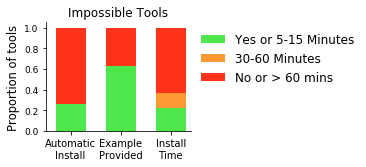

In [8]:
#pos 1 will be User Intervention Required
#pos 2 will be Example Provided
#pos 3 will be Time bins
N = 3

green = (len(dif_auto.index)/length, len(dif_ex_y.index)/length, len(dif_5_15_time.index)/length)

yellow = (0, 0, len(dif_30_60_time.index)/length)

red = ((length-len(dif_auto.index))/length,
         len(dif_ex_n.index)/length,
         len(dif_60_time.index)/length)



ind = np.arange(N)    # the x locations for the groups
width = 0.6       # the width of the bars: can also be len(x) sequence

f, ax = plt.subplots(1, 1, figsize=(2.6,2))

p1 = plt.bar(ind, green, width, color=my_colors.green)
p2 = plt.bar(ind, yellow, width, color=my_colors.orange,
             bottom=green)
p3 = plt.bar(ind, red, width, color=my_colors.red,
             bottom=np.array(yellow)+np.array(green))

simpleaxis(ax)

ax.set_ylabel('Proportion of tools', fontsize=11.5)
ax.set_title('Impossible Tools')

ax.set_xlim(-0.5,2.4)
ax.set_xticks(ind)
ax.set_xticklabels(['Automatic\nInstall', 'Example\nProvided', 'Install\nTime'])
                   
ax.set_yticks(np.arange(0.0, 1.2, 0.2))
ax.set_yticklabels(map(lambda x: '{:2.1f}'.format(x), np.arange(0.0, 1.1, 0.2)), fontsize=9)
ax.set_ylim(0,1.05)

plt.legend((p1[0], p2[0], p3[0]), ('Yes or 5-15 Minutes', '30-60 Minutes', 'No or > 60 mins'), 
            frameon=False, bbox_to_anchor=(1,1), fontsize=12)

plt.savefig('Figure_2_panels/Impossibru_summary.pdf')

In [9]:
# Summary for Impossible Install
dif_status = data[(data.Difficulty_Status==1)]
length = len(dif_status.index)

dif_5_15_time = dif_status[(dif_status.Time_To_Install >= 0) & (dif_status.Time_To_Install <= 15)]
dif_30_60_time = dif_status[(dif_status.Time_To_Install >= 30) & (dif_status.Time_To_Install < 60)]
dif_60_time = dif_status[(dif_status.Time_To_Install >= 60)]

dif_ex_y = dif_status[(dif_status.Example_Provided == 'Y')]
dif_ex_n = dif_status[(dif_status.Example_Provided == 'N')]

dif_auto = dif_status[(dif_status.Commands == dif_status.Commands_Listed)]

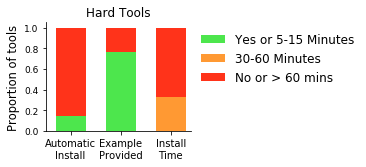

In [10]:
#pos 1 will be User Intervention Required
#pos 2 will be Example Provided
#pos 3 will be Time bins
N = 3

green = (len(dif_auto.index)/length, len(dif_ex_y.index)/length, len(dif_5_15_time.index)/length)

yellow = (0, 0, len(dif_30_60_time.index)/length)

red = ((length-len(dif_auto.index))/length,
         len(dif_ex_n.index)/length,
         len(dif_60_time.index)/length)



ind = np.arange(N)    # the x locations for the groups
width = 0.6       # the width of the bars: can also be len(x) sequence

f, ax = plt.subplots(1, 1, figsize=(2.6,2))

p1 = plt.bar(ind, green, width, color=my_colors.green)
p2 = plt.bar(ind, yellow, width, color=my_colors.orange,
             bottom=green)
p3 = plt.bar(ind, red, width, color=my_colors.red,
             bottom=np.array(yellow)+np.array(green))

simpleaxis(ax)

ax.set_ylabel('Proportion of tools', fontsize=11.5)
ax.set_title('Hard Tools')

ax.set_xlim(-0.5,2.4)
ax.set_xticks(ind)
ax.set_xticklabels(['Automatic\nInstall', 'Example\nProvided', 'Install\nTime'])
                   
ax.set_yticks(np.arange(0.0, 1.2, 0.2))
ax.set_yticklabels(map(lambda x: '{:2.1f}'.format(x), np.arange(0.0, 1.1, 0.2)), fontsize=9)
ax.set_ylim(0,1.05)

plt.legend((p1[0], p2[0], p3[0]), ('Yes or 5-15 Minutes', '30-60 Minutes', 'No or > 60 mins'), 
            frameon=False, bbox_to_anchor=(1,1), fontsize=12)

plt.savefig('Figure_2_panels/Hard_summary.pdf')

In [11]:
# Summary for Impossible Install
dif_status = data[(data.Difficulty_Status==2)]
length = len(dif_status.index)

dif_5_15_time = dif_status[(dif_status.Time_To_Install >= 0) & (dif_status.Time_To_Install <= 15)]
dif_30_60_time = dif_status[(dif_status.Time_To_Install >= 30) & (dif_status.Time_To_Install < 60)]
dif_60_time = dif_status[(dif_status.Time_To_Install >= 60)]

dif_ex_y = dif_status[(dif_status.Example_Provided == 'Y')]
dif_ex_n = dif_status[(dif_status.Example_Provided == 'N')]

dif_auto = dif_status[(dif_status.Commands == dif_status.Commands_Listed)]

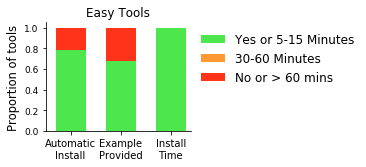

In [12]:
#pos 1 will be User Intervention Required
#pos 2 will be Example Provided
#pos 3 will be Time bins
N = 3

green = (len(dif_auto.index)/length, len(dif_ex_y.index)/length, len(dif_5_15_time.index)/length)

yellow = (0, 0, len(dif_30_60_time.index)/length)

red = ((length-len(dif_auto.index))/length,
         len(dif_ex_n.index)/length,
         len(dif_60_time.index)/length)



ind = np.arange(N)    # the x locations for the groups
width = 0.6       # the width of the bars: can also be len(x) sequence

f, ax = plt.subplots(1, 1, figsize=(2.6,2))

p1 = plt.bar(ind, green, width, color=my_colors.green)
p2 = plt.bar(ind, yellow, width, color=my_colors.orange,
             bottom=green)
p3 = plt.bar(ind, red, width, color=my_colors.red,
             bottom=np.array(yellow)+np.array(green))

simpleaxis(ax)

ax.set_ylabel('Proportion of tools', fontsize=11.5)
ax.set_title('Easy Tools')

ax.set_xlim(-0.5,2.4)
ax.set_xticks(ind)
ax.set_xticklabels(['Automatic\nInstall', 'Example\nProvided', 'Install\nTime'])
                   
ax.set_yticks(np.arange(0.0, 1.2, 0.2))
ax.set_yticklabels(map(lambda x: '{:2.1f}'.format(x), np.arange(0.0, 1.1, 0.2)), fontsize=9)
ax.set_ylim(0,1.05)

plt.legend((p1[0], p2[0], p3[0]), ('Yes or 5-15 Minutes', '30-60 Minutes', 'No or > 60 mins'), 
            frameon=False, bbox_to_anchor=(1,1), fontsize=12)

plt.savefig('Figure_2_panels/Easy_summary.pdf')


## FIGURE A: Summary Pie Charts of the Data
### FIGURE A.1: Complex, Easy, and Not Installed

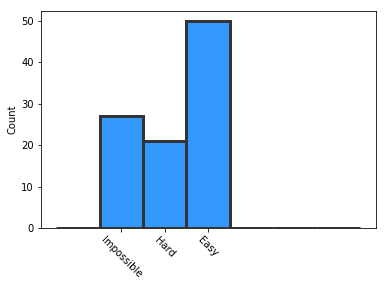

In [13]:
statuses = np.array(data["Difficulty_Status"])


f, ax = pl.subplots(1, 1)
ax.hist(statuses, np.arange(-1.5,6,1), edgecolor=(0.2,0.2,0.2), lw=3, 
            color=(0.2,0.6,1.0))

ax.set_ylabel('Count')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels( ['Impossible', 'Hard', 'Easy'], rotation=-45 )

pl.show()

In [14]:
#Lets get some data for a piechart regarding if Example is Provided
dif_status = data.groupby(['Difficulty_Status',]).size()
dif_status.head()

Difficulty_Status
0    27
1    21
2    50
dtype: int64

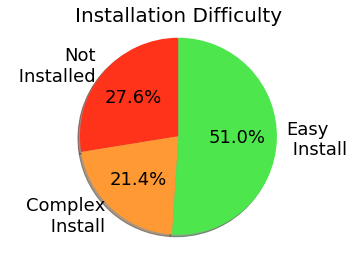

In [15]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 18
labels = ['Not\n Installed', 'Complex\n Install', 'Easy\n Install']
sizes = [dif_status[0], dif_status[1], dif_status[2]]
values = [my_colors.red, my_colors.orange, my_colors.green]
fig1, ax1 = pl.subplots()

ax1.set_title("Installation Difficulty", fontsize=20)
patches, texts, autotexts= ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = values)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
texts[0].set_fontsize(18)
texts[1].set_fontsize(18)
texts[2].set_fontsize(18)
pl.savefig('Figure_2_panels/Difficulty_pie.pdf')

### FIGURE A.2: Automatic Installation Test??

In [16]:
#This means #commands == number listed and that installation was not impossible
#My numbers are not quite matching up with the original Figure 2 images.
pass_status = data[(data.Difficulty_Status!=0) & (data.Commands==data.Commands_Listed)]
pass_status.head()

,Unnamed:_0,Source_,Normalized_citations,Commands,Commands_Listed,Time_To_Install,Difficulty_Status,Example_Provided
0,1,Bioconda,1122.600000,1.0,1.0,5,2,Y
1,2,Bioconda,13.833333,1.0,1.0,5,2,Y
2,3,Bioconda,5.142857,1.0,1.0,5,2,Y
3,4,Bioconda,163.200000,1.0,1.0,5,2,Y
4,5,Bioconda,247.400000,1.0,1.0,15,2,Y


In [17]:
fail_status = data[(data.Difficulty_Status==0) | (data.Commands!=data.Commands_Listed)]
fail_status.head()

,Unnamed:_0,Source_,Normalized_citations,Commands,Commands_Listed,Time_To_Install,Difficulty_Status,Example_Provided
8,9,NaN,6.833333,22.0,4.0,30,1,Y
10,11,NaN,1059.000000,10.0,7.0,60,1,Y
11,12,Bioconductor,159.000000,20.0,2.0,60,1,Y
12,13,pip,73.166667,12.0,10.0,60,1,Y
13,14,BitBucket,36.250000,30.0,10.0,120,1,Y


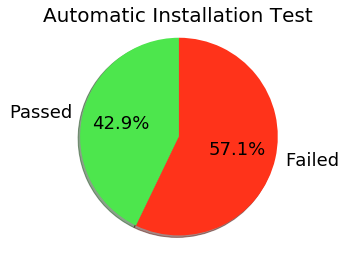

In [18]:
labels = ['Passed', 'Failed']
sizes = [len(pass_status.index), len(fail_status.index)]
values = [my_colors.green, my_colors.red]
fig1, ax1 = pl.subplots()

# ax1.set_fontsize(18)
ax1.set_title("Automatic Installation Test", fontsize=20)
patches, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = values)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
texts[0].set_fontsize(18)
texts[1].set_fontsize(18)
pl.savefig('Figure_2_panels/Auto_intallation_pie.pdf')

### FIGURE A.3: Example Provided

In [19]:
#Lets get clean some data for a piechart regarding if Example is Provided
ex_prov_pie = data.groupby(['Example_Provided',]).size()

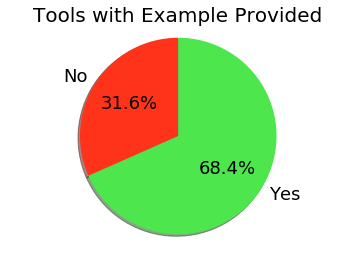

In [20]:
labels = ['No', 'Yes']
sizes = [ex_prov_pie[0], ex_prov_pie[1]]
values = [my_colors.red, my_colors.green]
fig1, ax1 = pl.subplots()

# ax1.set_fontsize(18)
ax1.set_title("Tools with Example Provided", fontsize=20)
patches, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = values)
texts[0].set_fontsize(18)
texts[1].set_fontsize(18)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
pl.savefig('Figure_2_panels/Example_provided_pie.pdf')

## FIGURE B: Automatic Installation Test vs Installation Time

1.1064619887075837e-08


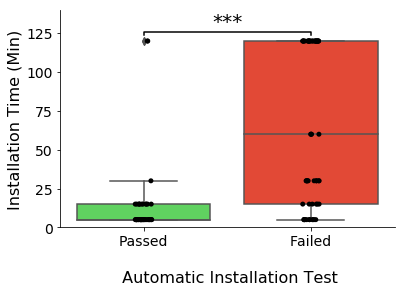

<Figure size 648x648 with 0 Axes>

In [21]:
data["auto_test"] = np.where((data.Difficulty_Status!=0) & (data.Commands==data.Commands_Listed),'Pass','Fail')

sns.boxplot(x="auto_test", y="Time_To_Install", data=data, palette=[my_colors.green, my_colors.red])
sns.stripplot(x="auto_test", y="Time_To_Install", data=data, palette=["black"], jitter=0.05)

x1, x2 = 0, 1
y, h, col = data['Time_To_Install'].max() + 4, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

p_value = stats.kruskal(data[(data.auto_test=='Fail')].Time_To_Install.tolist(),
                         data[(data.auto_test=='Pass')].Time_To_Install.tolist())

print(p_value[1])
plt.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col, fontsize=20)


plt.ylim(ymin=0) 
plt.ylim(ymax=140) 
plt.xlabel("\n Automatic Installation Test", fontsize=16)
plt.ylabel("Installation Time (Min)", fontsize=16)
plt.xticks([0,1], ["Passed", "Failed"], color='k', fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plt.figure(figsize=(9, 9))
plt.show()

KruskalResult(statistic=32.644603461692164, pvalue=1.1064619887075837e-08)


<Figure size 432x288 with 0 Axes>

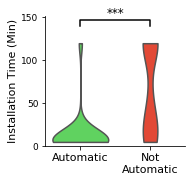

<Figure size 360x360 with 0 Axes>

In [22]:
plt.clf()

f, ax = plt.subplots(1, 1, figsize=(2.5, 2.4))

data["auto_test"] = np.where((data.Difficulty_Status!=0) & (data.Commands==data.Commands_Listed),'Pass','Fail')

x1, x2 = 0, 1
y, h, col = data['Time_To_Install'].max() + 20, 7, 'k'
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

p_value = stats.kruskal(data[(data.auto_test=='Fail')].Time_To_Install.tolist(),
                         data[(data.auto_test=='Pass')].Time_To_Install.tolist())

print (p_value)
ax.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col, fontsize=12)


sns.catplot(x="auto_test", y="Time_To_Install", data=data, palette=[my_colors.green, my_colors.red], 
            kind="violin", cut=0, inner=None, ax=ax)

plt.clf() # I couldn't figure out any other way to make the extra canvas created by seaborn to disappear.

simpleaxis(ax)

ax.set_ylabel("Installation Time (Min)", fontsize=11)
ax.set_xticks([0,1])
ax.set_xlabel('')
ax.set_xticklabels(["Automatic", "Not\nAutomatic"], color='k', fontsize=11)
ax.set_ylim(0, 152)
ax.set_yticks([0,50,100, 150])
ax.set_yticklabels([0,50,100, 150], fontsize=9)
#plt.yticks(fontsize=14)

f.savefig('Figure_2_panels/installation_time_automatic.pdf')

## FIGURE C: Statistical Significance of Citations based on Difficulty of Installation

In [23]:
#Lets get clean some data to get sums for the number of citations
dif_status_mean = data.groupby(['Difficulty_Status',]).mean()
dif_status_std = data.groupby(['Difficulty_Status',]).std()
dif_status_size = data.groupby(['Difficulty_Status',]).size()
dif_status_sum = data.groupby(['Difficulty_Status',]).sum()
dif_status_mean.head()

,Unnamed:_0,Normalized_citations,Commands,Commands_Listed,Time_To_Install
Difficulty_Status,,,,,
0,65.592593,10.385391,18.866667,6.555556,82.222222
1,40.619048,89.462642,12.350000,4.470588,78.571429
2,46.060000,108.689726,2.829787,2.733333,7.800000


In [24]:
dif_status_std.head()

,Unnamed:_0,Normalized_citations,Commands,Commands_Listed,Time_To_Install
Difficulty_Status,,,,,
0,21.175565,11.287159,47.485136,6.563914,50.617976
1,29.761512,229.439292,12.145066,3.356293,41.867137
2,29.122829,287.123460,2.784422,2.847647,4.535574


In [25]:
# Custom function to draw the diff bars
def label_diff(i,j,text,X,Y):
    x = (X[i]+X[j])/2
    y = 1.1*max(Y[i], Y[j])
    dx = abs(X[i]-X[j])

    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':25,'shrinkB':25,'linewidth':1.5}
    ax.annotate(text, xy=(X[i],y+7), zorder=10)
    ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)

0.013003908818903877
0.3709977836511217
0.12157400695752978


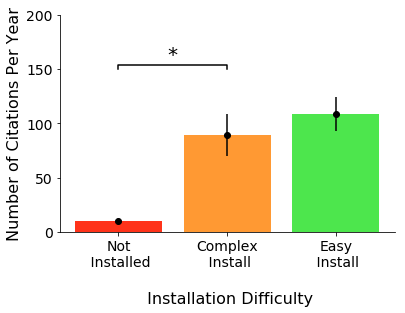

<Figure size 648x648 with 0 Axes>

In [26]:
colors = [my_colors.red, my_colors.orange, my_colors.green]
std     = [i for i in dif_status_std["Normalized_citations"]]
means   = [i for i in dif_status_mean["Normalized_citations"]]
ns = [i for i in dif_status_size]

ind  = np.arange(3)    # the x locations for the groups
width= 0.7
labels = ('Not\n Installed', 'Complex\n Install', 'Easy\n Install')

fig, ax = plt.subplots()
ax.p1 = plt.bar(ind, means, color=colors)

x1, x2 = 0, 1
y, h, col = 150, 4, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

# Impossible vs Hard (S)
p_value = stats.kruskal(data[(data.Difficulty_Status == 0)].Normalized_citations.tolist(),
                         data[(data.Difficulty_Status == 1)].Normalized_citations.tolist())
print(p_value[1])

plt.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col, fontsize=20)

# Hard vs Easy
p_value = stats.kruskal(data[(data.Difficulty_Status==1)].Normalized_citations.tolist(),
                         data[(data.Difficulty_Status==2)].Normalized_citations.tolist())
# label_diff(1,2,'P-Value: %.3f' %(p_value[1]), ind, means)
print(p_value[1])

# Easy vs Impossible
p_value = stats.kruskal(data[(data.Difficulty_Status==0)].Normalized_citations.tolist(),
                         data[(data.Difficulty_Status==2)].Normalized_citations.tolist())
# label_diff(0,2,'P-Value: %.3f' %(p_value[1]), ind, means)
print(p_value[1])


plt.errorbar(ind, means, yerr=[x/math.sqrt(n) for x,n in zip(means,ns)], fmt='o', color='black')
plt.ylim(ymax=200) 
# plt.title("Number of Citations Per Year Based on Tool Installation Difficulty\n", fontsize=14)
plt.ylabel("Number of Citations Per Year", fontsize=16)
plt.xlabel("\n Installation Difficulty", fontsize=16)
plt.xticks(ind, labels, color='k', fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plt.figure(figsize=(9, 9))
plt.show()

0.035428310716473885


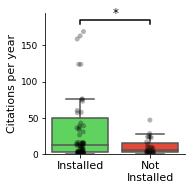

In [27]:
f, ax = plt.subplots(1, 1, figsize=(2.5,2.6))


data["install_category"] = np.where((data.Difficulty_Status==0),'Unsuccessful','Success')
sns.boxplot(x="install_category", y="Normalized_citations", data=data, showfliers=False,
            palette=[my_colors.green, my_colors.red],  order=["Success", "Unsuccessful"])

sns.stripplot(x="install_category", y="Normalized_citations",  alpha=0.3,
              palette=['black'], data=data,  jitter=0.05, order=["Success", "Unsuccessful"])

labels = ('Installed', 'Not\nInstalled')
x1, x2 = 1, 0
y, h, col = 180, 5, 'k'

ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

# Impossible vs Hard (S)
p_value = stats.kruskal(data[(data.install_category == "Success")].Normalized_citations.tolist(),
                         data[(data.install_category == "Unsuccessful")].Normalized_citations.tolist())
print(p_value[1])

ind = np.arange(2)

ax.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col, fontsize=12)

ax.set_ylim(ymax=195) 
ax.set_ylim(ymin=0) 
ax.set_ylabel("Citations per year", fontsize=11)
ax.set_xlabel('')
ax.set_xticks(ind)
ax.set_xticklabels(labels, fontsize=11)

ax.set_yticks([0,50,100,150])
ax.set_yticklabels([0,50,100,150], fontsize=9)

simpleaxis(ax)

#sns.despine()
#plt.figure(figsize=(9, 9))

plt.savefig('Figure_2_panels/Citations_per_year_box.pdf')

0.013003908818903877


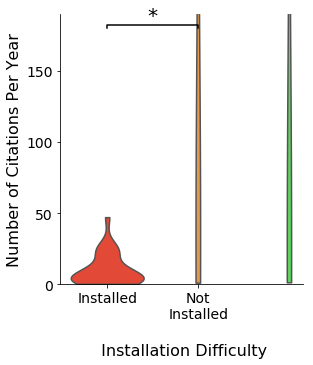

<Figure size 648x648 with 0 Axes>

In [28]:
sns.catplot(x="Difficulty_Status", y="Normalized_citations", data=data, cut=0, 
            kind="violin", palette=[my_colors.red, my_colors.orange, my_colors.green], inner=None)


x1, x2 = 0, 1
y, h, col = 180, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

# Impossible vs Hard (S)
p_value = stats.kruskal(data[(data.Difficulty_Status == 0)].Normalized_citations.tolist(),
                         data[(data.Difficulty_Status == 1)].Normalized_citations.tolist())
print(p_value[1])

plt.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col, fontsize=20)

# Impossible vs Easy (NS)
# p_value = stats.ks_2samp(data[(data.Difficulty_Status == 0)].Normalized_citations.tolist(),
#                          data[(data.Difficulty_Status == 2)].Normalized_citations.tolist())
# print p_value[1]
# plt.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col)

# Hard vs Easy (NS)
# p_value = stats.ks_2samp(data[(data.Difficulty_Status == 1)].Normalized_citations.tolist(),
#                          data[(data.Difficulty_Status == 2)].Normalized_citations.tolist())
# print p_value[1]



plt.ylim(ymax=190) 
plt.ylim(ymin=0) 
plt.ylabel("Number of Citations Per Year", fontsize=16)
plt.xlabel("\n Installation Difficulty", fontsize=16)
plt.xticks(ind, labels, color='k', fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plt.figure(figsize=(9, 9))
plt.show()

0.01097753860728718
8.286234518662968e-08


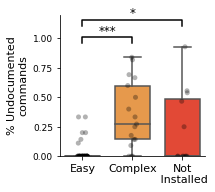

In [29]:
import math
f, ax = plt.subplots(1, 1, figsize=(2.6,2.6))

data["Portion_Undocumented"] = (data["Commands"]-data["Commands_Listed"])/(data["Commands"] + data["Commands_Listed"])
sns.boxplot(x="Difficulty_Status", y="Portion_Undocumented", data=data,  ax = ax, width=0.7, showfliers=False,
            palette=[my_colors.green, my_colors.orange, my_colors.red], order=[2,1,0])

sns.stripplot(x="Difficulty_Status", y="Portion_Undocumented", data=data, palette=["black"], order=[2,1,0], alpha=0.3)

labels = ('Easy', 'Complex', 'Not\n Installed')
ind  = np.arange(3)

x1, x2 = 0, 2
y, h, col = data['Portion_Undocumented'].max() + 0.18, 0.05, 'k'

ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
list_0 = [i for i in data[(data.Difficulty_Status==0)].Portion_Undocumented.tolist() if str(i) != 'nan']
    

p_value = stats.kruskal([i for i in data[(data.Difficulty_Status==0)].Portion_Undocumented.tolist() if str(i) != 'nan'],
                        [i for i in data[(data.Difficulty_Status==2)].Portion_Undocumented.tolist() if str(i) != 'nan'])
print(p_value[1])
ax.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col, fontsize=12)


x1, x2 = 0, 1
y, h, col = data['Portion_Undocumented'].max() + 0.03, 0.05, 'k'
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

p_value = stats.kruskal([i for i in data[(data.Difficulty_Status==1)].Portion_Undocumented.tolist() if str(i) != 'nan'],
                        [i for i in data[(data.Difficulty_Status==2)].Portion_Undocumented.tolist() if str(i) != 'nan'])
print(p_value[1])
ax.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col, fontsize=12)

simpleaxis(ax)

ax.set_ylim(ymin=0) 
ax.set_ylim(ymax=1.2) 
ax.set_ylabel("% Undocumented\ncommands", fontsize=11)
ax.set_xticks([0,1,2])
ax.set_xlim(-0.45,2.45)
ax.set_xlabel('')
ax.set_yticks([0.,0.25,0.5,0.75,1])
ax.set_yticklabels(['0.00','0.25','0.50','0.75','1.00'], fontsize=9)
ax.set_xticklabels(labels, color='k', fontsize=11)

plt.savefig('Figure_2_panels/percent_undocumented_commands.pdf')

## FIGURE E: Percent of Tools installed based on package manager.

In [30]:
data.groupby('Source_').count()

,Unnamed:_0,Normalized_citations,Commands,Commands_Listed,Time_To_Install,Difficulty_Status,Example_Provided,auto_test,install_category,Portion_Undocumented
Source_,,,,,,,,,,
Bioconda,8,8,8,8,8,8,8,8,8,8
Bioconductor,5,5,5,5,5,5,5,5,5,5
BitBucket,3,3,3,3,3,3,3,3,3,3
Github,20,20,19,19,20,20,20,20,20,18
SourceForge,10,10,8,5,10,10,10,10,10,5
pip,1,1,1,1,1,1,1,1,1,1


100.0 67.85714285714286


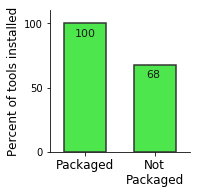

In [31]:
data_pkg = data[ (data['Source_'] == 'Bioconda') | (data['Source_'] == 'Bioconductor') | (data['Source_'] == 'pip') ]
rate_pkg = (data_pkg.install_category == 'Success').sum()/data_pkg.shape[0]*100

data_nopkg = data[ (data['Source_'] != 'Bioconda') & (data['Source_'] != 'Bioconductor') & (data['Source_'] != 'pip') ]
rate_nopkg = (data_nopkg.install_category == 'Success').sum()/data_nopkg.shape[0]*100

f, ax = plt.subplots(1, 1, figsize=(2.5,2.6))

labels = ('Packaged', 'Not\nPackaged')
x1, x2 = 1, 0
y, h, col = 180, 5, 'k'

pl.bar([0,1], [rate_pkg, rate_nopkg], 0.6, edgecolor=(0.2,0.2,0.2), lw=1.5, color=my_colors.green)

print(rate_pkg, rate_nopkg)
pl.text(-0.15, 90, '100', fontsize=11, color=(0.1,0.1,0.1))
pl.text(0.88, 58, '68', fontsize=11, color=(0.1,0.1,0.1))

ax.set_ylim(0, 110)
ax.set_yticklabels([0,50,100], fontsize=10)
ax.set_ylabel("Percent of tools installed", fontsize=12)
ax.set_xlabel('')
ax.set_xlim(-0.5,1.5)
ax.set_xticks([0,1])
ax.set_xticklabels(labels, fontsize=12)

simpleaxis(ax)

plt.savefig('Figure_2_panels/Citations_per_year_box.pdf')

## Supplementary Figures: Effect of Bioconda Package Manger on Installation Time

In [33]:

conditions = [
    (data['Source_'] == 'Bioconda'),
     (data['Source_'].isnull())]
choices = ['Bioconda', 'N/A']
data['custom_source'] = np.select(conditions, choices, default='Other')


KruskalResult(statistic=9.201027953410616, pvalue=0.0024187926102591157)
KruskalResult(statistic=7.081765986346138, pvalue=0.007787222823984111)


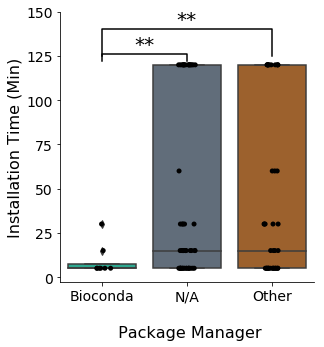

<Figure size 648x648 with 0 Axes>

In [37]:

sns.catplot(x="custom_source", y="Time_To_Install", kind="box", data=data, palette=["#1ABC9C","#5D6D7E", "#AF601A"])
# sns.swarmplot(x="custom_source", y="Time_To_Install", data=data, palette=["#7D3C98","#717D7E", "#2874A6"])
sns.stripplot(x="custom_source", y="Time_To_Install", data=data, palette=["black"])

x1, x2 = 0, 1
y, h, col = data['Time_To_Install'].max() + 2, 4, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

p_value = stats.kruskal(data[(data.custom_source=='Bioconda')].Normalized_citations.tolist(),
                         data[(data.custom_source=='N/A')].Normalized_citations.tolist())
print(p_value)
plt.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col, fontsize=20)

x1, x2 = 0, 2
y, h, col = data['Time_To_Install'].max() + 5, 15, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

p_value = stats.kruskal(data[(data.custom_source=='Bioconda')].Normalized_citations.tolist(),
                         data[(data.custom_source=='Other')].Normalized_citations.tolist())

print(p_value)
plt.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col, fontsize=20)

plt.ylim(ymax=150) 
plt.xlabel("\n Package Manager", fontsize=16)
plt.ylabel("Installation Time (Min)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.figure(figsize=(9, 9))
plt.show()

KruskalResult(statistic=9.201027953410616, pvalue=0.0024187926102591157)
KruskalResult(statistic=7.081765986346138, pvalue=0.007787222823984111)


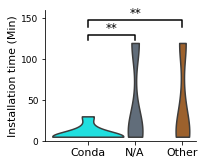

<Figure size 360x360 with 0 Axes>

In [36]:

f,ax = plt.subplots(1, 1, figsize=(2.7, 2.4))

sns.catplot(x="custom_source", y="Time_To_Install", kind="violin", width=1.5,
            data=data, palette=["#00FFFF","#5D6D7E", "#AF601A"],fliersize=0, cut=0, inner=None, ax=ax)

plt.clf()   # I couldn't figure out any other way to make the extra canvas created by seaborn to disappear.

x1, x2 = 0, 1
y, h, col = data['Time_To_Install'].max() + 4, 6, 'k'
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

p_value = stats.kruskal(data[(data.custom_source=='Bioconda')].Normalized_citations.tolist(),
                         data[(data.custom_source=='N/A')].Normalized_citations.tolist())

print (p_value)
ax.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col, fontsize=12)

x1, x2 = 0, 2
y, h, col = data['Time_To_Install'].max() + 20, 8, 'k'
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

p_value = stats.kruskal(data[(data.custom_source=='Bioconda')].Normalized_citations.tolist(),
                         data[(data.custom_source=='Other')].Normalized_citations.tolist())

print (p_value)
ax.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col, fontsize=12)

simpleaxis(ax)

ax.set_ylim(ymin=0) 
ax.set_ylim(ymax=160) 
ax.set_ylabel("Installation time (Min)", fontsize=11)
ax.set_xticks([0,1,2])
ax.set_xlabel('')
ax.set_yticks([0,50,100,150])
ax.set_yticklabels([0,50,100,150], fontsize=9)
ax.set_xticklabels(["Conda", "N/A", "Other"], color='k', fontsize=11)
f.savefig('Figure_2_panels/packaging.pdf')